In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
import seaborn as sns
from datetime import datetime
from datetime import date

%matplotlib inline


In [176]:
#pip install -U imbalanced-learn --user

Requirement already up-to-date: imbalanced-learn in c:\users\asus\appdata\roaming\python\python37\site-packages (0.6.2)
Note: you may need to restart the kernel to use updated packages.


In [3]:
tvs = pd.read_csv(r'C:\Users\ASUS\Desktop\TVS\TVS.csv',low_memory=False)

In [4]:
tvs.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32
0,1,0,0,24.0,0.0,2432.0,46500.0,24.0,1385.0,SC,...,NaN,NaN,46500.0,NaN,NaN,0,0,0,TIER 1,0
1,2,0,1,24.0,1.0,1495.0,28168.0,24.0,2496.0,MO,...,NaN,NaN,28168.0,NaN,NaN,0,0,0,TIER 1,0
2,3,0,0,26.0,0.0,1707.0,38900.0,30.0,1346.0,SC,...,NaN,105000.0,38900.0,34.0,31.0,31,31,16,TIER 1,0
3,4,0,0,24.0,0.0,2128.0,42900.0,24.0,1375.0,SC,...,NaN,NaN,42900.0,NaN,NaN,0,0,0,TIER 1,0
4,5,0,0,27.0,0.0,1824.0,40900.0,30.0,4140.0,MC,...,NaN,NaN,40900.0,NaN,NaN,0,0,0,TIER 1,0


In [5]:
tvs.shape

(119528, 32)

In [6]:
tvs.isnull().sum()

V1          0
V2          0
V3          0
V4      34480
V5      34480
V6      34480
V7      34480
V8      34480
V9      34480
V10     34480
V11     34480
V12     34480
V13     34480
V14     34480
V15     35397
V16     34480
V17     34480
V18         0
V19         0
V20         0
V21     82902
V22         0
V23    100247
V24    100500
V25     15061
V26    106097
V27     99095
V28         0
V29         0
V30         0
V31         0
V32         0
dtype: int64

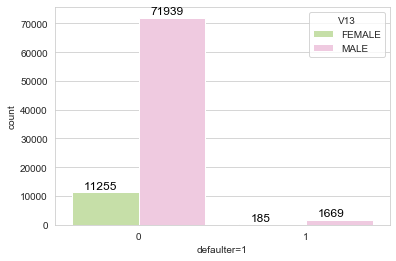

In [7]:
sns.set_style('whitegrid')
fig=sns.countplot(x='V32', hue='V13', data=tvs,palette='PiYG_r')
fig.set(xlabel='defaulter=1', ylabel='count')
for i in fig.patches:
    # get_x pulls left or right; get_height pushes up or down
    fig.text(i.get_x()+.07, i.get_height()+1200, str(round((i.get_height()), 2)), fontsize=12, color='black',
                rotation=0)

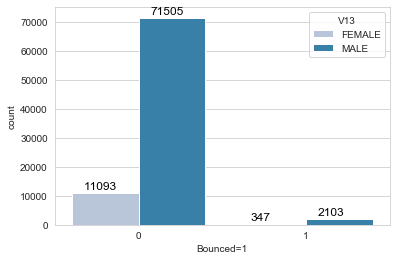

In [8]:
sns.set_style('whitegrid')
fig=sns.countplot(x='V2', hue='V13', data=tvs,palette='PuBu')
fig.set(xlabel='Bounced=1', ylabel='count')

for i in fig.patches:
    # get_x pulls left or right; get_height pushes up or down
    fig.text(i.get_x()+.07, i.get_height()+1000, str(round((i.get_height()), 2)), fontsize=12, color='black',
                rotation=0)

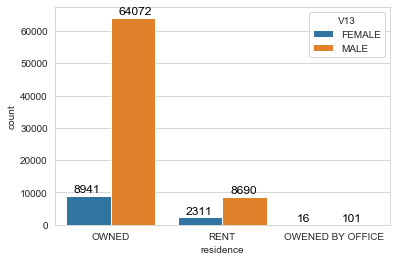

In [9]:
sns.set_style('whitegrid')
fig=sns.countplot(x='V15', hue='V13', data=tvs)
fig.set(xlabel='residence', ylabel='count')

for i in fig.patches:
    # get_x pulls left or right; get_height pushes up or down
    fig.text(i.get_x()+.07, i.get_height()+1000, str(round((i.get_height()), 2)), fontsize=12, color='black',
                rotation=0)

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


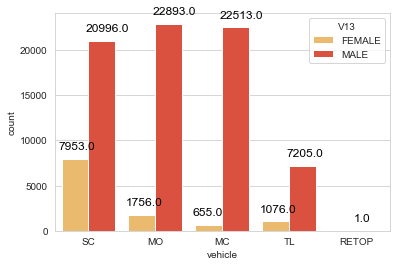

In [10]:
sns.set_style('whitegrid')
fig=sns.countplot(x='V10', hue='V13', data=tvs,palette='YlOrRd')
fig.set(xlabel='vehicle', ylabel='count')

for i in fig.patches:
    # get_x pulls left or right; get_height pushes up or down
    fig.text(i.get_x()-.04, i.get_height()+1000, str(round((i.get_height()), 2)), fontsize=12, color='black',
                rotation=0)

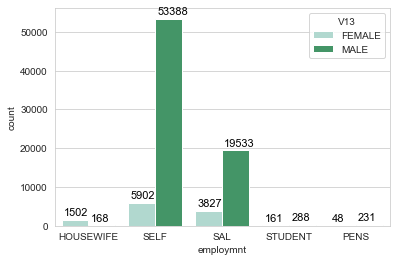

In [11]:
sns.set_style('whitegrid')
fig=sns.countplot(x='V14', hue='V13', data=tvs,palette='BuGn')
fig.set(xlabel='employmnt', ylabel='count')

for i in fig.patches:
    # get_x pulls left or right; get_height pushes up or down
    fig.text(i.get_x()+.03, i.get_height()+1000, str(round((i.get_height()), 2)), fontsize=11, color='black',
                rotation=0)

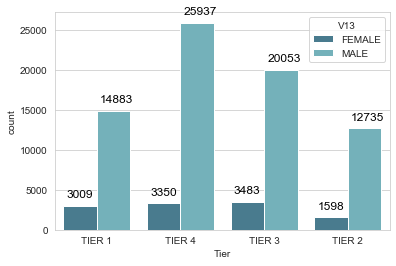

In [12]:
sns.set_style('whitegrid')
fig=sns.countplot(x='V31', hue='V13', data=tvs,palette='GnBu_d')
fig.set(xlabel='Tier', ylabel='count')
for i in fig.patches:
    # get_x pulls left or right; get_height pushes up or down
    fig.text(i.get_x()+.04, i.get_height()+1000, str(round((i.get_height()), 2)), fontsize=12, color='black',
                rotation=0)

In [13]:
tvs['V10'].value_counts()

SC       28949
MO       24649
MC       23168
TL        8281
RETOP        1
Name: V10, dtype: int64

In [14]:
tvs['V2'].value_counts()

0    116136
1      3392
Name: V2, dtype: int64

In [15]:
tvs['V14'].value_counts()

SELF         59290
SAL          23360
HOUSEWIFE     1670
STUDENT        449
PENS           279
Name: V14, dtype: int64

In [16]:
tvs['V31'].value_counts()

TIER 4    41063
TIER 3    33178
TIER 1    25168
TIER 2    20119
Name: V31, dtype: int64

In [17]:
tvs['V32'].value_counts()

0    116914
1      2614
Name: V32, dtype: int64

In [18]:
tvs['V15'].value_counts()

OWNED               73013
RENT                11001
OWENED BY OFFICE      117
Name: V15, dtype: int64

In [19]:
tvs.isnull().sum()

V1          0
V2          0
V3          0
V4      34480
V5      34480
V6      34480
V7      34480
V8      34480
V9      34480
V10     34480
V11     34480
V12     34480
V13     34480
V14     34480
V15     35397
V16     34480
V17     34480
V18         0
V19         0
V20         0
V21     82902
V22         0
V23    100247
V24    100500
V25     15061
V26    106097
V27     99095
V28         0
V29         0
V30         0
V31         0
V32         0
dtype: int64

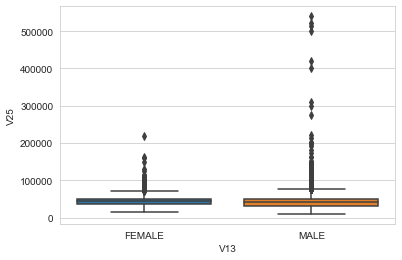

In [20]:
sns.set_style("whitegrid") 
sns.boxplot(x = 'V13', y = 'V25', data = tvs) 

In [21]:
tvs['V25'] = tvs['V25'].fillna((tvs['V25'].median()))

In [22]:
tvs=tvs.drop(['V21', 'V23','V24','V26','V27'], axis = 1)

In [23]:
tvs=tvs.dropna()

In [24]:
tvs.shape

(84131, 27)

In [25]:
tvs = tvs.reset_index(drop=True)

In [26]:
tvs=tvs.drop(['V1','V9'], axis = 1)

In [27]:
tvs.columns

Index(['V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V10', 'V11', 'V12', 'V13',
       'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V22', 'V25', 'V28',
       'V29', 'V30', 'V31', 'V32'],
      dtype='object')

## Change DOB to age

In [28]:
tvs['V16'].head()

0    30-05-1974
1    01-09-1967
2    04-05-1983
3    10-12-1989
4    24-09-1984
Name: V16, dtype: object

In [29]:
tvs['V16'] = pd.to_datetime(tvs['V16'], errors='coerce')

In [30]:
now = pd.to_datetime('now')
now


Timestamp('2020-03-08 15:36:38.661055')

In [31]:
tvs['V16']=(now - tvs['V16']).dt.total_seconds() / (60*60*24*365.25)

In [32]:
tvs['V16'].head()

0    45.775908
1    53.162630
2    36.927174
3    30.405614
4    35.454211
Name: V16, dtype: float64

# Dummy Creation

##  V10---Vehicle type----MC(motorcycle) as reference

## V13------Gender-----Male(1), Female(0) 

## V14------Employment-----Housewife as reference

## V15------Residence------Owned by Office as reference

## V31------Tier-----------Tier 1 as reference
                       

In [33]:
tvs.columns

Index(['V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V10', 'V11', 'V12', 'V13',
       'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V22', 'V25', 'V28',
       'V29', 'V30', 'V31', 'V32'],
      dtype='object')

In [34]:
tvs.head()

,V2,V3,V4,V5,V6,V7,V8,V10,V11,V12,...,V18,V19,V20,V22,V25,V28,V29,V30,V31,V32
0,0,0,24.0,0.0,2432.0,46500.0,24.0,SC,0.0,12.75,...,1,1,0,0,46500.0,0,0,0,TIER 1,0
1,0,1,24.0,1.0,1495.0,28168.0,24.0,MO,0.0,13.65,...,1,1,0,0,28168.0,0,0,0,TIER 1,0
2,0,0,26.0,0.0,1707.0,38900.0,30.0,SC,0.0,12.65,...,9,6,3,0,38900.0,31,31,16,TIER 1,0
3,0,0,24.0,0.0,2128.0,42900.0,24.0,SC,2.0,9.50,...,1,1,0,0,42900.0,0,0,0,TIER 1,0
4,0,0,27.0,0.0,1824.0,40900.0,30.0,MC,0.0,13.50,...,1,1,0,0,40900.0,0,0,0,TIER 1,0


In [35]:
tvs['V10'].value_counts()

SC       28483
MO       24445
MC       23024
TL        8178
RETOP        1
Name: V10, dtype: int64

In [36]:
Vehc = pd.get_dummies(tvs['V10'],prefix='vehc',drop_first=True)

In [37]:
Vehc.head()

,vehc_MO,vehc_RETOP,vehc_SC,vehc_TL
0,0,0,1,0
1,1,0,0,0
2,0,0,1,0
3,0,0,1,0
4,0,0,0,0


In [38]:
tvs['V13'].value_counts()

MALE      72863
FEMALE    11268
Name: V13, dtype: int64

In [39]:
tvs['V13'].replace(to_replace=['MALE','FEMALE'], value=[1,0],inplace=True)

In [40]:
tvs['V14'].value_counts()

SELF         58918
SAL          22856
HOUSEWIFE     1640
STUDENT        441
PENS           276
Name: V14, dtype: int64

In [41]:
Emp = pd.get_dummies(tvs['V14'],prefix='emp',drop_first=True)

In [42]:
Emp.head()

,emp_PENS,emp_SAL,emp_SELF,emp_STUDENT
0,0,0,0,0
1,0,0,1,0
2,0,0,1,0
3,0,1,0,0
4,0,1,0,0


In [43]:
tvs['V15'].value_counts()

OWNED               73013
RENT                11001
OWENED BY OFFICE      117
Name: V15, dtype: int64

In [44]:
Res = pd.get_dummies(tvs['V15'],prefix='res',drop_first=True)

In [45]:
Res.head()

,res_OWNED,res_RENT
0,1,0
1,0,1
2,0,1
3,0,1
4,0,1


In [46]:
tvs['V31'].value_counts()

TIER 4    28981
TIER 3    23318
TIER 1    17571
TIER 2    14261
Name: V31, dtype: int64

In [47]:
Tier = pd.get_dummies(tvs['V31'],prefix='tier',drop_first=True)

In [48]:
Tier.head()

,tier_TIER 2,tier_TIER 3,tier_TIER 4
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0


In [49]:
tvs = pd.concat([tvs, Vehc,Emp,Res,Tier], axis=1)

### V22 has all zero values

In [50]:
tvs=tvs.drop(['V10','V14','V15','V22','V31'], axis=1)

In [51]:
tvs.columns

Index(['V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V11', 'V12', 'V13', 'V16',
       'V17', 'V18', 'V19', 'V20', 'V25', 'V28', 'V29', 'V30', 'V32',
       'vehc_MO', 'vehc_RETOP', 'vehc_SC', 'vehc_TL', 'emp_PENS', 'emp_SAL',
       'emp_SELF', 'emp_STUDENT', 'res_OWNED', 'res_RENT', 'tier_TIER 2',
       'tier_TIER 3', 'tier_TIER 4'],
      dtype='object')

# Feature Selection

In [54]:
feature_cols=['V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V11', 'V12', 'V13', 'V16',
       'V17', 'V18', 'V19', 'V20', 'V25', 'V28', 'V29', 'V30', 
       'vehc_MO', 'vehc_RETOP', 'vehc_SC', 'vehc_TL', 'emp_PENS', 'emp_SAL',
       'emp_SELF', 'emp_STUDENT', 'res_OWNED', 'res_RENT', 'tier_TIER 2',
       'tier_TIER 3', 'tier_TIER 4']
dept_col=['V32']
X=tvs[feature_cols]
y=tvs[dept_col]





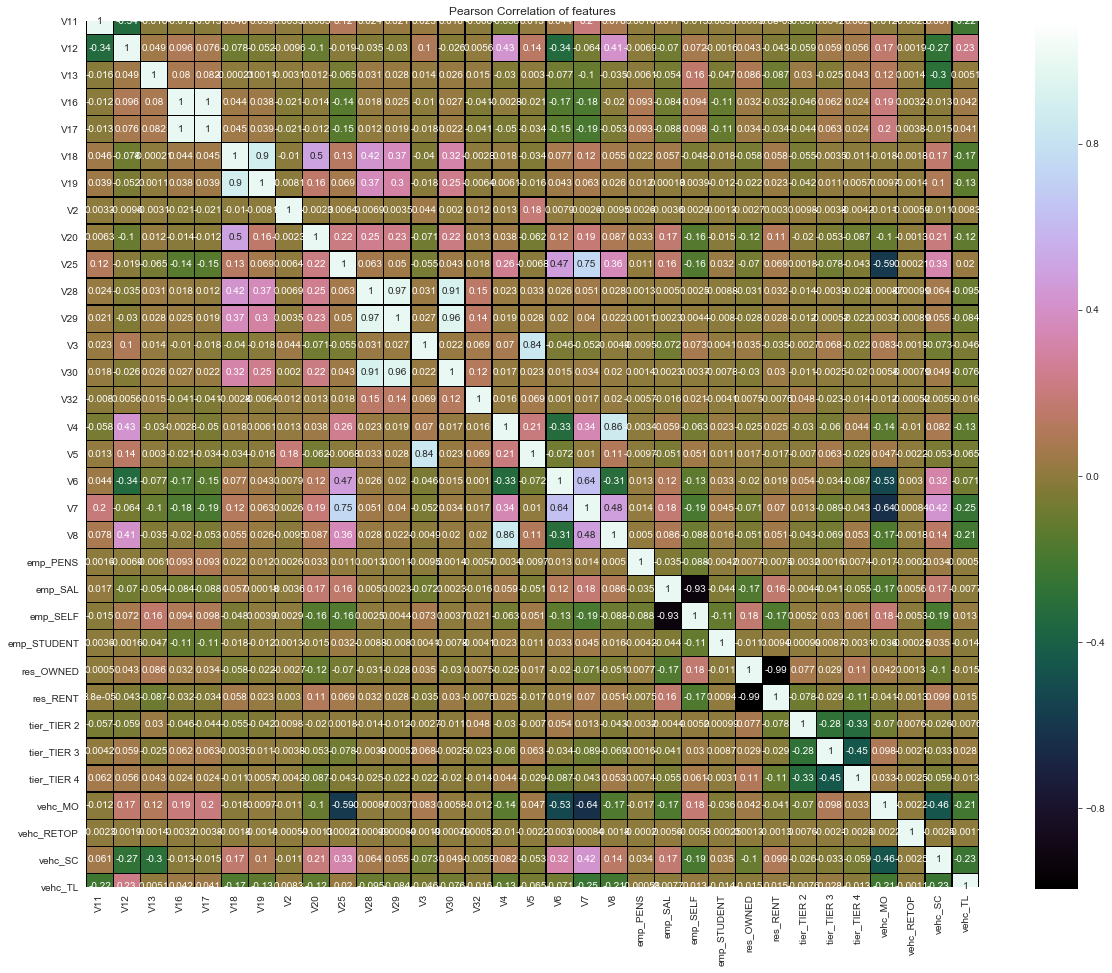

In [55]:
str_list = [] # empty list to contain columns with strings (words)
for colname, colvalue in tvs.iteritems():
    if type(colvalue[1]) == str:
         str_list.append(colname)
# Get to the numeric columns by inversion            
num_list = tvs.columns.difference(str_list) 
# Create Dataframe containing only numerical features
house_num = tvs[num_list]
f, ax = plt.subplots(figsize=(20, 16))
plt.title('Pearson Correlation of features')
# Draw the heatmap using seaborn
#sns.heatmap(house_num.astype(float).corr(),linewidths=0.25,vmax=1.0, square=True, cmap="PuBuGn", linecolor='k', annot=True)
sns.heatmap(house_num.astype(float).corr(),linewidths=0.30,vmax=1.1, square=True, cmap="cubehelix", linecolor='k', annot=True)

In [56]:
feature_cols=['V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V11', 'V12', 'V13', 'V16',
       'V17', 'V18', 'V19', 'V20', 'V25', 'V28', 'V29', 'V30', 
       'vehc_MO', 'vehc_RETOP', 'vehc_SC', 'vehc_TL', 'emp_PENS', 'emp_SAL',
       'emp_SELF', 'emp_STUDENT', 'res_OWNED', 'res_RENT', 'tier_TIER 2',
       'tier_TIER 3', 'tier_TIER 4']

X=tvs[feature_cols]
y=tvs['V32']





### SMOTE

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,accuracy_score

from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
columns = X_train.columns
os_data_X,os_data_y=os.fit_sample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['V32'])
# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of no subscription in oversampled data",len(os_data_y[os_data_y['V32']==0]))
print("Number of subscription",len(os_data_y[os_data_y['V32']==1]))
print("Proportion of no subscription data in oversampled data is ",len(os_data_y[os_data_y['V32']==0])/len(os_data_X))
print("Proportion of subscription data in oversampled data is ",len(os_data_y[os_data_y['V32']==1])/len(os_data_X))

feature_cols=['V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V11', 'V12', 'V13', 'V16',
       'V17', 'V18', 'V19', 'V20', 'V25', 'V28', 'V29', 'V30', 
       'vehc_MO', 'vehc_RETOP', 'vehc_SC', 'vehc_TL', 'emp_PENS', 'emp_SAL',
       'emp_SELF', 'emp_STUDENT', 'res_OWNED', 'res_RENT', 'tier_TIER 2',
       'tier_TIER 3', 'tier_TIER 4']



X=os_data_X[feature_cols]
y=os_data_y['V32']

## Factor Analysis

## Methods Used

### Recursive Factor Exclusion , Linear Regression , Ridge , Lasso , Random Forest

In [57]:
from sklearn.feature_selection import RFE, f_regression
from sklearn.linear_model import (LinearRegression, Ridge, Lasso)
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor

In [58]:
# Define dictionary to store our rankings
ranks = {}
# Create our function which stores the feature rankings to the ranks dictionary
def ranking(ranks, names, order=1):
    minmax = MinMaxScaler()
    ranks = minmax.fit_transform(order*np.array([ranks]).T).T[0]
    ranks = map(lambda x: round(x,2), ranks)
    return dict(zip(names, ranks))

In [59]:
# Construct our Linear Regression model
lr = LinearRegression(normalize=True)
lr.fit(X,y)
#stop the search when only the last feature is left
rfe = RFE(lr, n_features_to_select=1, verbose =3 )
rfe.fit(X,y)
ranks["RFE"] = ranking(list(map(float, rfe.ranking_)), feature_cols, order=-1)

Fitting estimator with 32 features.
Fitting estimator with 31 features.
Fitting estimator with 30 features.
Fitting estimator with 29 features.
Fitting estimator with 28 features.
Fitting estimator with 27 features.
Fitting estimator with 26 features.
Fitting estimator with 25 features.
Fitting estimator with 24 features.
Fitting estimator with 23 features.
Fitting estimator with 22 features.
Fitting estimator with 21 features.
Fitting estimator with 20 features.
Fitting estimator with 19 features.
Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 features.
Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 feature

In [60]:
# Using Linear Regression
lr = LinearRegression(normalize=True)
lr.fit(X,y)
ranks["LinReg"] = ranking(np.abs(lr.coef_), feature_cols)

# Using Ridge 
ridge = Ridge(alpha = 7)
ridge.fit(X,y)
ranks['Ridge'] = ranking(np.abs(ridge.coef_), feature_cols)

# Using Lasso
lasso = Lasso(alpha=.05)
lasso.fit(X, y)
ranks["Lasso"] = ranking(np.abs(lasso.coef_), feature_cols)

In [61]:
rf = RandomForestRegressor(n_jobs=-1, n_estimators=50, verbose=3)
rf.fit(X,y)
ranks["RF"] = ranking(rf.feature_importances_, feature_cols);

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 50building tree 2 of 50building tree 3 of 50


building tree 4 of 50
building tree 5 of 50
building tree 6 of 50
building tree 7 of 50
building tree 8 of 50
building tree 9 of 50
building tree 10 of 50
building tree 11 of 50
building tree 12 of 50
building tree 13 of 50
building tree 14 of 50
building tree 15 of 50
building tree 16 of 50
building tree 17 of 50
building tree 18 of 50
building tree 19 of 50
building tree 20 of 50
building tree 21 of 50
building tree 22 of 50
building tree 23 of 50
building tree 24 of 50
building tree 25 of 50
building tree 26 of 50
building tree 27 of 50


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   11.4s


building tree 28 of 50
building tree 29 of 50
building tree 30 of 50
building tree 31 of 50
building tree 32 of 50
building tree 33 of 50
building tree 34 of 50
building tree 35 of 50
building tree 36 of 50
building tree 37 of 50
building tree 38 of 50
building tree 39 of 50
building tree 40 of 50
building tree 41 of 50
building tree 42 of 50
building tree 43 of 50
building tree 44 of 50
building tree 45 of 50
building tree 46 of 50
building tree 47 of 50
building tree 48 of 50
building tree 49 of 50
building tree 50 of 50


[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   23.3s finished


In [62]:
# Create empty dictionary to store the mean value calculated from all the scores
r = {}
for name in feature_cols:
    r[name] = round(np.mean([ranks[method][name] 
                             for method in ranks.keys()]), 2)
 
methods = sorted(ranks.keys())
ranks["Mean"] = r
methods.append("Mean")
 
print("\t                %s" % "\t".join(methods))
for name in feature_cols:
    print("%s        \t       %s" % (name, "\t".join(map(str, 
                         [ranks[method][name] for method in methods]))))

	                Lasso	LinReg	RF	RFE	Ridge	Mean
V2        	       0.0	0.04	0.04	0.29	0.1	0.09
V3        	       0.0	0.17	0.18	0.94	0.41	0.34
V4        	       0.0	0.02	0.43	0.23	0.06	0.15
V5        	       0.0	0.11	0.19	0.71	0.27	0.26
V6        	       0.0	0.0	0.88	0.06	0.0	0.19
V7        	       0.0	0.0	0.55	0.03	0.0	0.12
V8        	       0.0	0.02	0.14	0.26	0.06	0.1
V11        	       0.0	0.07	0.16	0.35	0.16	0.15
V12        	       0.0	0.0	0.65	0.13	0.01	0.16
V13        	       0.0	0.06	0.05	0.61	0.15	0.17
V16        	       0.04	0.08	1.0	0.58	0.19	0.38
V17        	       0.0	0.07	0.41	0.55	0.16	0.24
V18        	       0.0	0.04	0.41	0.42	0.1	0.19
V19        	       0.0	0.01	0.13	0.16	0.02	0.06
V20        	       0.0	0.02	0.13	0.32	0.04	0.1
V25        	       0.0	0.0	0.47	0.0	0.0	0.09
V28        	       1.0	0.32	0.46	0.9	0.75	0.69
V29        	       0.0	0.01	0.22	0.19	0.03	0.09
V30        	       0.0	0.31	0.12	0.87	0.74	0.41
vehc_MO        	       0.0	0.11	0.03	0.81	0.27	0.24
vehc_RET

In [63]:
# Put the mean scores into a Pandas dataframe
meanplot = pd.DataFrame(list(r.items()), columns= ['Feature','Mean Ranking'])

# Sort the dataframe
meanplot = meanplot.sort_values('Mean Ranking', ascending=False)

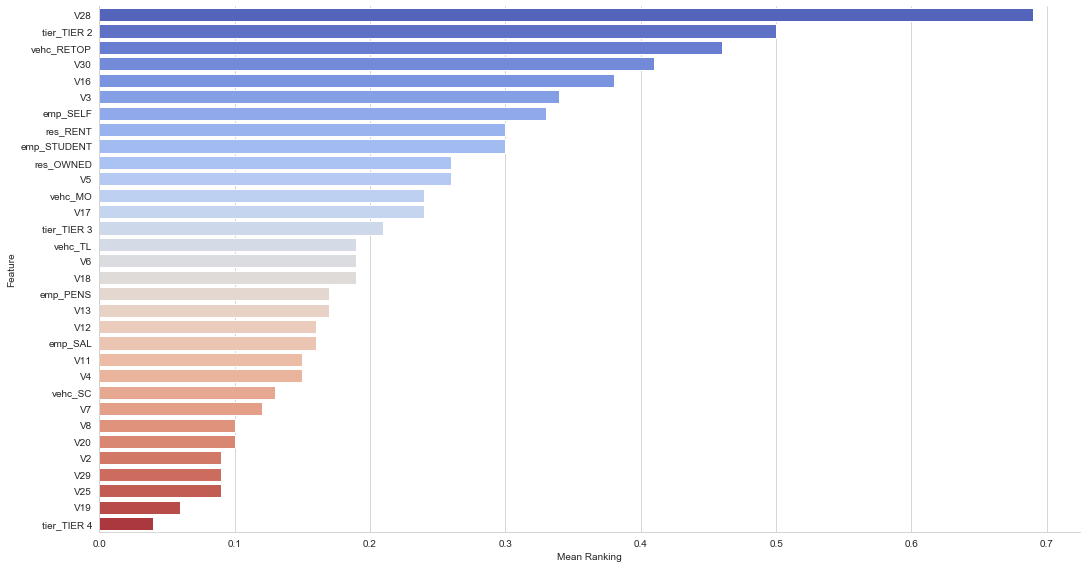

In [70]:
# Let's plot the ranking of the features
sns.factorplot(x="Mean Ranking", y="Feature", data = meanplot, kind="bar", 
               size=8, aspect=1.9, palette='coolwarm')

# Factors Exclusion

## RFE

In [114]:
tvs_vars=tvs.columns.values.tolist()
y=['V32']
X=[i for i in tvs_vars if i not in y]
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state=1, solver='newton-cg',
                         multi_class='multinomial',max_iter=1200)
rfe = RFE(logreg, 25)
rfe = rfe.fit(os_data_X, os_data_y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:426: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
C:\Users\ASUS\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\optimize.py:204: UserWarning: Line Search failed
  warnings.warn('Line Search failed')
C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\ProgramData\Anaconda

[ True  True False  True False False False  True  True  True  True  True
 False  True  True False  True False  True  True  True  True  True  True
  True  True  True  True  True  True  True  True]
[1 1 2 1 6 7 3 1 1 1 1 1 4 1 1 8 1 5 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [96]:
feature_cols=[ 'V3', 'V4', 'V5', 'V6', 'V7', 'V11', 'V12', 'V13', 'V16',
       'V17', 'V18', 'V28', 'V30', 
       'vehc_MO', 'vehc_RETOP', 'vehc_SC', 'vehc_TL', 'emp_PENS', 'emp_SAL',
       'emp_SELF', 'emp_STUDENT', 'res_OWNED', 'res_RENT', 'tier_TIER 2',
       'tier_TIER 3']

X=tvs[feature_cols]
y=tvs['V32']





In [97]:

import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit(maxiter=150)
print(result.summary2())

         Current function value: inf
         Iterations: 150


LinAlgError: Singular matrix

### Factors Excluded ----   V6 , V7 , V8 , V25 , Vehc_Retop

In [106]:
feature_cols=[ 'V3','V4', 'V5',  'V11', 'V13', 'V16',
       'V17', 'V19', 'V20', 'V28', 'V29', 'V30', 
       'vehc_MO', 'vehc_TL', 'emp_SAL',
    'emp_STUDENT', 'res_OWNED', 'res_RENT', 'tier_TIER 2',
       'tier_TIER 3']

X=tvs[feature_cols]
y=tvs['V32']

In [107]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit(maxiter=150)
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.094024
         Iterations 9
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.107     
Dependent Variable: V32              AIC:              15860.6015
Date:               2020-03-08 21:31 BIC:              16047.4041
No. Observations:   84131            Log-Likelihood:   -7910.3   
Df Model:           19               LL-Null:          -8857.1   
Df Residuals:       84111            LLR p-value:      0.0000    
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     9.0000                                       
------------------------------------------------------------------
              Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
------------------------------------------------------------------
V3            0.2146    0.0363    5.9075  0.0000   0.1434   0.2859
V4            0.0189    0.0059    3.2069  0.0013   0.0074   0.

# Logistic R

In [150]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,accuracy_score

from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVR
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression

In [109]:
X= preprocessing.StandardScaler().fit(X).transform(X)
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=1)

In [153]:
num_samples = 5
test_size = 0.25
num_instances = len(X)
seed = 1
kfold = model_selection.ShuffleSplit(n_splits=10, test_size=test_size, random_state=seed)
model = LogisticRegression(random_state=1, solver='newton-cg',
                         multi_class='multinomial',max_iter=1200000)
results = model_selection.cross_val_score(model, X, y, cv=kfold)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

Accuracy: 97.703% (0.088%)


In [110]:
# instantiate the model (using the default parameters)
logreg = LogisticRegression(random_state=1, solver='lbfgs',
                         multi_class='multinomial',max_iter=1200000)

# fit the model with data
logreg.fit(x_train,y_train)

#
y_pred=logreg.predict(x_test)

In [111]:
print(logreg.coef_)
print(logreg.intercept_)

[[ 0.09800451  0.04660662  0.04902401 -0.0281283   0.05062279 -0.76051956
   0.6306081  -0.50259031 -0.11885827  0.66439949 -0.11810547 -0.26184501
  -0.02122534 -0.04812501 -0.04162478 -0.03759418 -0.02812056 -0.05442269
   0.11126421 -0.04713824]]
[-2.11029769]


In [112]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[20551,    29],
       [  449,     4]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

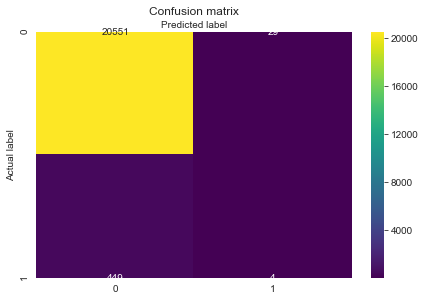

In [113]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="viridis" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [114]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     20580
           1       0.12      0.01      0.02       453

    accuracy                           0.98     21033
   macro avg       0.55      0.50      0.50     21033
weighted avg       0.96      0.98      0.97     21033



In [139]:
y_pred = logreg.predict(x_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(x_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.98


In [140]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.9772738078257975
Precision: 0.12121212121212122
Recall: 0.008830022075055188


In [142]:
f1_score(y_test, y_pred) 

0.01646090534979424

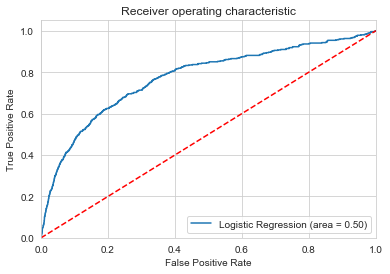

In [119]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [122]:
print("Area under curve : ", logit_roc_auc)

Area under curve :  0.5037104434962254


# K Neighbour Classifier

In [123]:
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn.model_selection import cross_val_score

In [124]:
trainScores={}

In [73]:
from sklearn.neighbors import KNeighborsClassifier

bestScore=0.0
accList=[]

for k in range(3,12):
    
    clf_knn = KNeighborsClassifier(n_neighbors=k,algorithm='auto')
    
    # using 10 fold cross validation for scoring the classifier's accuracy
    scores = cross_val_score(clf_knn, x_train, y_train, cv=10)
    score=scores.mean()
    accList.append(score)
    
    if score > bestScore:
        bestScore=score
        best_clf=clf_knn
        bestK=k
        
print("Best K is :",bestK,"| Cross validation Accuracy :",bestScore)
clf_knn=best_clf

Best K is : 4 | Cross validation Accuracy : 0.9500815903552275


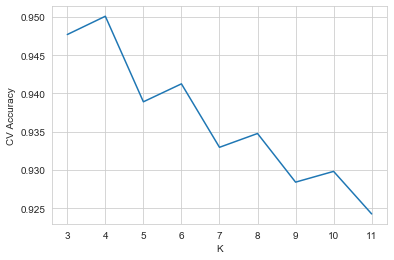

In [74]:
plt.plot(range(3,12),accList)
plt.xlabel('K')
plt.ylabel('CV Accuracy')
plt.show()

In [75]:
clf_knn.fit(x_train,y_train)
y_pred=best_clf.predict(x_train)

In [76]:
trainScores['KNN-jaccard']=jaccard_score(y_train, y_pred)
trainScores['KNN-f1-score']=f1_score(y_train, y_pred, average='weighted')

In [125]:
trainScores

{}

# Decision Tree

In [78]:
from sklearn import tree

clf_tree = tree.DecisionTreeClassifier()
clf_tree = clf_tree.fit(x_train, y_train)

y_pred=clf_tree.predict(x_train)

In [79]:
trainScores['Tree-jaccard']=jaccard_score(y_train, y_pred)
trainScores['Tree-f1-score']=f1_score(y_train, y_pred, average='weighted')

In [80]:
trainScores

{'KNN-jaccard': 0.9466223928608488,
 'KNN-f1-score': 0.9722115359651051,
 'Tree-jaccard': 1.0,
 'Tree-f1-score': 1.0}

##  *******   Decision tree graph (Use if needed, heavy lag)  ***************

!pip install graphviz
!pip install pydotplus
import graphviz 
import pydotplus

dot_data = tree.export_graphviz(clf_tree, out_file=None, 
                     feature_names=['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Flight Distance',
       'Seat comfort', 'Departure/Arrival time convenient', 'Food and drink',
       'Gate location', 'Inflight wifi service', 'Inflight entertainment',
       'Online support', 'Ease of Online booking', 'On-board service',
       'Leg room service', 'Baggage handling', 'Checkin service',
       'Cleanliness', 'Online boarding', 'Departure Delay in Minutes',
       'Arrival Delay in Minutes', 'class_Eco', 'class_Eco Plus'],  
                     class_names='satisfaction',  
                     filled=True, rounded=True,  
                     special_characters=True) 

graph = pydotplus.graph_from_dot_data(dot_data)
graph.set_size('"16,16!"')
gvz_graph = graphviz.Source(graph.to_string())

gvz_graph

# Support vector Machine (SVM)

In [126]:
y_train=y_train.astype(float)

In [127]:
from sklearn import svm

clf_svm = svm.LinearSVC(random_state=7,max_iter=120000)
clf_svm.fit(x_train, y_train)  

y_pred=clf_svm.predict(x_train)

C:\Users\ASUS\AppData\Roaming\Python\Python37\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [129]:
trainScores['SVM-jaccard']=jaccard_score(y_train, y_pred)
trainScores['SVM-f1-score']=f1_score(y_train, y_pred, average='weighted')

trainScores

# LogReg 2

In [130]:
from sklearn.linear_model import LogisticRegression

clf_log = LogisticRegression(random_state=1, solver='newton-cg',
                         multi_class='multinomial')
clf_log.fit(x_train, y_train)

y_pred=clf_log.predict(x_train)
y_proba=clf_log.predict_proba(x_train)

In [131]:
trainScores['LogReg-jaccard']=jaccard_score(y_train, y_pred)
trainScores['LogReg-f1-score']=f1_score(y_train, y_pred, average='weighted')  
trainScores['LogReg-logLoss']=log_loss(y_train, y_proba)

In [132]:
trainScores

{'SVM-jaccard': 0.0021536252692031586,
 'SVM-f1-score': 0.9672042015943404,
 'LogReg-jaccard': 0.015151515151515152,
 'LogReg-f1-score': 0.9674458283280913,
 'LogReg-logLoss': 0.09349018036708649}

# Test Scores

In [133]:
testScores={}

### KNN Test

In [88]:
knn_pred=clf_knn.predict(x_test)
testScores['KNN-jaccard']=jaccard_score(y_test, knn_pred)
testScores['KNN-f1-score']=f1_score(y_test, knn_pred, average='weighted')

### Decision Tree Test

In [89]:
tree_pred=clf_tree.predict(x_test)
testScores['Tree-jaccard']=jaccard_score(y_test, tree_pred)
testScores['Tree-f1-score']=f1_score(y_test, tree_pred, average='weighted')

### SVM test

In [134]:
svm_pred=clf_svm.predict(x_test)
testScores['SVM-jaccard']=jaccard_score(y_test, svm_pred)
testScores['SVM-f1-score']=f1_score(y_test, svm_pred, average='weighted')

### LogReg Test

In [143]:
log_pred=clf_log.predict(x_test)
proba=clf_log.predict_proba(x_test)
testScores['LogReg-jaccard']=jaccard_score(y_test, log_pred)
testScores['LogReg-f1-score']=f1_score(y_test, log_pred)  
testScores['LogReg-logLoss']=log_loss(y_test, proba)

In [144]:
testScores

{'SVM-jaccard': 0.004395604395604396,
 'SVM-f1-score': 0.967998342402801,
 'LogReg-jaccard': 0.008298755186721992,
 'LogReg-f1-score': 0.01646090534979424,
 'LogReg-logLoss': 0.09543651360852345}

# Test Scores Comparison

In [94]:
Jaccard = [0.9089089696161077,0.9364205256570713,0.7867217468279728,0.792161029455168]
F1_score = [0.9513002956680857,0.9670732838287489,0.8828464870716576,0.8858709319099023]
LogLoss = ['NA','NA','NA',0.2832133118614762]

    
df = {'Algorithm': ['KNN', 'Decision Tree', 'SVM', 'Logistic Regression'], \
     'Jaccard': Jaccard, 'F1-score': F1_score, 'LogLoss': LogLoss}

Report = pd.DataFrame(data=df, columns=['Algorithm', 'Jaccard', 'F1-score', 'LogLoss'], index=None)
Report

,Algorithm,Jaccard,F1-score,LogLoss
0,KNN,0.908909,0.951300,NA
1,Decision Tree,0.936421,0.967073,NA
2,SVM,0.786722,0.882846,NA
3,Logistic Regression,0.792161,0.885871,0.283213
